In [3]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta

In [4]:
from scripts.downloader import fetch_all_polls

In [5]:
all_polls = fetch_all_polls(cleanup=True, refresh=False)

In [6]:
all_polls.to_csv('poll_database/poll_database.csv', index=False)
all_polls.to_excel('poll_database/poll_database.xlsx', index=False)
all_polls.to_json('poll_database/poll_database.json', index=False, orient='split')

In [7]:
display_columns = ['date_concluded', 'pollster', 'conservative', 'labour', 'liberal_democrat', 'lead']

In [8]:
all_polls['anti_conservative'] = all_polls[['labour', 'liberal_democrat','green','scottish_national_party','plaid_cymru']].fillna(0).sum(axis=1)

In [9]:
all_polls[(all_polls.anti_conservative.fillna(0) ) >= 65][['date_concluded', 'pollster', 'labour', 'liberal_democrat','green','scottish_national_party','plaid_cymru','anti_conservative', 'lead']]

,date_concluded,pollster,labour,liberal_democrat,green,scottish_national_party,plaid_cymru,anti_conservative,lead
9,2022-06-12,Redfield & Wilton Strategies,39.0,15.0,6.0,5.0,1.0,66.0,lab+7.0
122,2022-01-25,Ipsos MORI,40.0,13.0,9.0,4.0,1.0,67.0,lab+9.0
137,2022-01-13,Find Out Now,41.0,11.0,8.0,5.0,1.0,66.0,lab+14.0
2627,2012-05-07,TNS,43.0,10.0,13.0,NaN,NaN,66.0,lab+13.0
3027,2011-02-16,YouGov,45.0,10.0,10.0,NaN,NaN,65.0,lab+10.0
...,...,...,...,...,...,...,...,...,...
4474,1993-04-26,Ipsos MORI,46.0,20.0,NaN,NaN,NaN,66.0,lab+14.0
4490,1992-11-30,Gallup,52.0,14.0,NaN,NaN,NaN,66.0,lab+23.0
4492,1992-11-12,Harris Interactive,51.0,14.0,NaN,NaN,NaN,65.0,lab+19.0
4493,1992-11-08,Harris Interactive,53.0,13.0,NaN,NaN,NaN,66.0,lab+23.0


In [10]:
all_polls.query("pollster=='YouGov' and lead_value>=5 and labour>conservative")[display_columns]

,date_concluded,pollster,conservative,labour,liberal_democrat,lead
6,2022-06-16,YouGov,33.0,39.0,10.0,lab+6.0
14,2022-06-09,YouGov,32.0,39.0,11.0,lab+7.0
25,2022-05-25,YouGov,31.0,39.0,12.0,lab+8.0
30,2022-05-19,YouGov,31.0,39.0,12.0,lab+8.0
37,2022-05-11,YouGov,33.0,38.0,12.0,lab+5.0
...,...,...,...,...,...,...
3857,2005-07-28,YouGov,31.0,40.0,21.0,lab+9.0
3861,2005-06-30,YouGov,33.0,38.0,20.0,lab+5.0
3864,2005-05-26,YouGov,31.0,38.0,23.0,lab+7.0
3933,2003-04-24,YouGov,32.0,40.0,21.0,lab+8.0


In [11]:
all_polls[all_polls.date_concluded > all_polls.query("labour<conservative and pollster == 'Opinium'").date_concluded.max()].query("pollster == 'Opinium'")

,date_started,date_concluded,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,plaid_cymru,reform_uk,scottish_national_party,social_democratic_party,united_kingdom_independence_party,reclaim_party,others,lead,lead_value,anti_conservative
0,2022-06-22,2022-06-24,Opinium,The Observer,GB,1516,34.0,37.0,11.0,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,7.0,lab+3.0,3.0,59.0
13,2022-06-08,2022-06-10,Opinium,The Observer,GB,2002,34.0,36.0,13.0,NaN,...,1.0,NaN,3.0,NaN,NaN,NaN,7.0,lab+2.0,2.0,59.0
22,2022-05-25,2022-05-27,Opinium,The Observer,GB,1513,33.0,36.0,11.0,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,8.0,lab+3.0,3.0,60.0
35,2022-05-11,2022-05-13,Opinium,The Observer,GB,1478,34.0,37.0,12.0,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,6.0,lab+3.0,3.0,61.0
48,2022-04-14,2022-04-26,Opinium,NaN,GB,4000,35.0,37.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lab+2.0,2.0,54.0
51,2022-04-20,2022-04-22,Opinium,The Observer,GB,2002,34.0,36.0,10.0,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,7.0,lab+2.0,2.0,59.0
61,2022-04-06,2022-04-08,Opinium,The Observer,GB,2004,34.0,38.0,10.0,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,7.0,lab+4.0,4.0,60.0
71,2022-03-23,2022-03-25,Opinium,The Observer,GB,2002,36.0,38.0,9.0,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,6.0,lab+2.0,2.0,59.0
82,2022-03-09,2022-03-11,Opinium,The Observer,GB,2007,35.0,37.0,9.0,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,7.0,lab+2.0,2.0,58.0
96,2022-02-23,2022-02-25,Opinium,The Observer,GB,2068,34.0,38.0,11.0,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,5.0,lab+4.0,4.0,60.0


In [12]:
all_polls[all_polls.date_concluded > all_polls.query("labour<=conservative").date_concluded.max()]

,date_started,date_concluded,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,plaid_cymru,reform_uk,scottish_national_party,social_democratic_party,united_kingdom_independence_party,reclaim_party,others,lead,lead_value,anti_conservative
0,2022-06-22,2022-06-24,Opinium,The Observer,GB,1516,34.0,37.0,11.0,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,7.0,lab+3.0,3.0,59.0
1,2022-06-22,2022-06-23,Techne UK,NaN,UK,1630,32.0,38.0,14.0,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,6.0,lab+6.0,6.0,62.0
2,2022-06-22,2022-06-22,Redfield & Wilton Strategies,NaN,GB,2000,32.0,41.0,13.0,NaN,...,0.0,4.0,4.0,NaN,NaN,NaN,2.0,lab+9.0,9.0,63.0
3,2022-06-16,2022-06-20,Kantar Public,NaN,GB,1141,34.0,36.0,13.0,NaN,...,1.0,4.0,4.0,NaN,2.0,NaN,1.0,lab+2.0,2.0,59.0
4,2022-06-17,2022-06-19,Savanta ComRes,NaN,UK,2050,31.0,42.0,10.0,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,7.0,lab+11.0,11.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2022-03-25,2022-03-27,Savanta ComRes,NaN,GB,2226,35.0,39.0,11.0,NaN,...,0.0,3.0,5.0,NaN,NaN,NaN,4.0,lab+4.0,4.0,58.0
71,2022-03-23,2022-03-25,Opinium,The Observer,GB,2002,36.0,38.0,9.0,NaN,...,1.0,NaN,4.0,NaN,NaN,NaN,6.0,lab+2.0,2.0,59.0
72,2022-03-23,2022-03-24,YouGov,The Times,GB,1759,35.0,37.0,10.0,NaN,...,1.0,4.0,4.0,NaN,NaN,NaN,2.0,lab+2.0,2.0,59.0
73,2022-03-23,2022-03-24,Techne UK,NaN,UK,1641,35.0,40.0,10.0,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,6.0,lab+5.0,5.0,59.0


In [13]:
all_polls.query("pollster=='Opinium' and labour >= 41")[display_columns]

,date_concluded,pollster,conservative,labour,liberal_democrat,lead
134,2022-01-14,Opinium,31.0,41.0,9.0,lab+10.0
162,2021-12-10,Opinium,32.0,41.0,9.0,lab+9.0
400,2021-01-15,Opinium,37.0,41.0,6.0,lab+4.0
437,2020-11-06,Opinium,38.0,42.0,7.0,lab+4.0
460,2020-09-25,Opinium,39.0,42.0,5.0,lab+3.0
976,2017-12-14,Opinium,39.0,41.0,7.0,lab+2.0
989,2017-11-16,Opinium,40.0,42.0,6.0,lab+2.0
999,2017-10-06,Opinium,40.0,42.0,5.0,lab+2.0
1010,2017-09-15,Opinium,41.0,41.0,5.0,Tie
1017,2017-08-18,Opinium,40.0,43.0,6.0,lab+3.0


In [14]:
#all_polls.query("pollster == 'YouGov' and conservative <31")[display_columns]

In [15]:
most_recent_date = all_polls.iloc[0].date_concluded
one_year_polls = all_polls[
    all_polls['date_concluded'] >= (most_recent_date + relativedelta(months=-12)).replace(day=1)].copy()

In [16]:
pollsters_latest = pd.DataFrame()
for pollster in one_year_polls.pollster.unique():
    pollster_data = one_year_polls.query(f'pollster == "{pollster}"')
    latest_poll = pollster_data.iloc[0]
    pollsters_latest = pollsters_latest.append(latest_poll)

In [17]:
top_five = {'Ipsos MORI': 100,
            'Opinium': 79,
            'YouGov': 77,
            'Kantar Public': 69,
            'Number Cruncher Politics': 61,
            'Survation': 59,
            'Panelbase': 57,
            'Deltapoll': 46,
            'BMG Research': 44,
            'FocalData': 39,
            'ICM Research': 35,
            'Savanta ComRes': 34,
            'Find Out Now': 34*0.5, # Ludicrous Local Election Polling
            'Redfield & Wilton Strategies': 34,
            'Techne UK': 34,
            }

top_two = {'Ipsos MORI': 100,
           'Survation': 85,
           'Kantar Public': 85,
           'Panelbase': 74,
           'Number Cruncher Politics': 71,
           'Opinium': 71,
           'YouGov': 67,
           'Deltapoll': 50,
           'FocalData': 42,
           'BMG Research': 39,
           'Savanta ComRes': 29,
           'ICM Research': 27,
           'Find Out Now': 34*0.5, # Ludicrous Local Election Polling
           'Redfield & Wilton Strategies': 34,
           'Techne UK': 34,
           }

In [18]:
(71*3+79*2+100)/6

78.5

In [19]:
recency_weights = {
    -1: 100,
    7: 100,
    15: 70,
    30: 5,
    90: 0
}


def get_recency_weight(date_concluded, current_date, return_category=False):
    days_since_poll = (current_date - date_concluded).days
    days_start_of_range = weight_start_of_range = 0
    category = 0
    for day, weight in recency_weights.items():
        category += 1
        if days_since_poll > day:
            days_start_of_range = day
            weight_start_of_range = weight
        else:
            percent_through_range = (days_since_poll - days_start_of_range)/(day - days_start_of_range)
            full_weight = weight_start_of_range - ((weight_start_of_range - weight)*percent_through_range)
            if return_category:
                return category - 2
            else:
                return full_weight
    if return_category:
        return category - 1
    else:
        return 0


In [20]:
def get_pollster_weight(pollster):
    if pollster not in top_two:
        return 0
    top_five_score = top_five[pollster]
    top_two_score = top_two[pollster]
    pollster_w = (3*top_two_score + 2*top_five_score + 100)/6
    return pollster_w


In [21]:
for pollster in one_year_polls.pollster.unique():
    print(f' {pollster:30s}: {get_pollster_weight(pollster):.1f}')

 Opinium                       : 78.5
 Techne UK                     : 45.0
 Redfield & Wilton Strategies  : 45.0
 Kantar Public                 : 82.2
 Savanta ComRes                : 42.5
 YouGov                        : 75.8
 Survation                     : 78.8
 Ipsos MORI                    : 100.0
 Deltapoll                     : 57.0
 Number Cruncher Politics      : 72.5
 Find Out Now                  : 30.8
 JL Partners Polls             : 0.0
 FocalData                     : 50.7
 Panelbase                     : 72.7


In [22]:
from scripts.constants import major_parties

In [23]:
pollsters_latest['recency_weight'] = pollsters_latest['date_concluded'].apply(get_recency_weight,
                                                                              current_date=most_recent_date)
pollsters_latest['pollster_weight'] = pollsters_latest['pollster'].apply(get_pollster_weight)
pollsters_latest['poll_weight'] = pollsters_latest['pollster_weight']*(pollsters_latest['recency_weight']/100)

In [24]:
current_average = pd.DataFrame(columns=major_parties + ['lead'], index=['Polling Average'])
lead_party = ''
max_vote_share = 0
second_vote_share = 0
for party in major_parties:
    party_vote_share = pollsters_latest[party].dot(pollsters_latest['poll_weight'])/pollsters_latest[
        'poll_weight'].sum()
    if party_vote_share > max_vote_share:
        second_vote_share = max_vote_share
        max_vote_share = party_vote_share
        lead_party = party
    else:
        if party_vote_share > second_vote_share:
            second_vote_share = party_vote_share
    current_average.loc['Polling Average', party] = party_vote_share
    #current_average.loc['Polling Average', party] = f'{party_vote_share:.1f}%'
#current_average.loc['Polling Average', 'lead'] = f'{lead_party:.3s}+{max_vote_share - second_vote_share:.1f}%'
current_average.loc['Polling Average', 'lead_value'] = max_vote_share - second_vote_share


In [25]:
one_year_polls['poll_month'] = one_year_polls['date_concluded'].apply(lambda x: x.replace(day=1))

In [26]:
pollster_monthly_summary = one_year_polls.groupby(['poll_month', 'pollster'])[major_parties].agg(['mean', 'count'])
pollster_monthly_summary.columns = [x if i == 0 else f'count{major_parties.index(x)}' for x in major_parties for i in
                                    range(0, 2)]
pollster_monthly_summary.drop(columns=[f'count{major_parties.index(x)}' for x in major_parties][1:], inplace=True)
pollster_monthly_summary.rename(columns={"count0": "count"}, inplace=True)

agg_info = {x: ['mean'] for x in major_parties}
agg_info['count'] = ['count', 'sum']
monthly_summary = pollster_monthly_summary.reset_index().groupby(['poll_month']).agg(agg_info)
monthly_summary.columns = major_parties + ['pollster_count', 'poll_count']

In [27]:
from scripts.functions import format_lead

monthly_summary[['lead', 'lead_value']] = monthly_summary.apply(format_lead, axis=1, result_type='expand')

In [28]:
display(pollsters_latest.sort_values(by='poll_weight', ascending=False)[display_columns])
display(current_average)
display(monthly_summary.iloc[:0:-1])

,date_concluded,pollster,conservative,labour,liberal_democrat,lead
3,2022-06-20,Kantar Public,34.0,36.0,13.0,lab+2.0
0,2022-06-24,Opinium,34.0,37.0,11.0,lab+3.0
6,2022-06-16,YouGov,33.0,39.0,10.0,lab+6.0
11,2022-06-10,Survation,34.0,41.0,10.0,lab+7.0
1,2022-06-23,Techne UK,32.0,38.0,14.0,lab+6.0
2,2022-06-22,Redfield & Wilton Strategies,32.0,41.0,13.0,lab+9.0
4,2022-06-19,Savanta ComRes,31.0,42.0,10.0,lab+11.0
32,2022-05-17,Ipsos MORI,33.0,39.0,12.0,lab+6.0
55,2022-04-14,Deltapoll,32.0,43.0,9.0,lab+11.0
93,2022-02-28,Number Cruncher Politics,35.0,42.0,8.0,lab+7.0


,conservative,labour,liberal_democrat,lead,lead_value
Polling Average,33.099885,38.741321,11.508071,NaN,5.641436


,conservative,labour,liberal_democrat,pollster_count,poll_count,lead,lead_value
poll_month,,,,,,,
2022-06-01,33.170068,38.765306,11.637755,7,20,lab+5.6,5.595238
2022-05-01,33.146939,38.800000,11.528571,7,24,lab+5.7,5.653061
2022-04-01,33.805556,39.944444,9.814815,9,22,lab+6.1,6.138889
2022-03-01,35.183333,38.725926,9.825926,9,26,lab+3.5,3.542593
2022-02-01,33.725000,39.850000,10.300000,10,23,lab+6.1,6.125000
2022-01-01,31.969444,40.513889,10.919444,12,29,lab+8.5,8.544444
2021-12-01,33.484848,38.340909,10.159091,11,30,lab+4.9,4.856061
2021-11-01,37.066667,36.575000,9.250000,10,23,con+0.5,0.491667
2021-10-01,39.268750,34.645833,8.289583,8,20,con+4.6,4.622917


In [29]:
from html2image import Html2Image

hti = Html2Image()

In [30]:



def result_to_opacity(result, range_min, range_max):
    result_range = range_max - range_min
    result_percent = (result - range_min)/result_range
    result_256 = int(result_percent*255)
    return f'{result_256:02x}'


def add_background_colour_to_cells(df, lead_only=False):
    from scripts.constants import party_colors, major_parties
    background_df = df.copy()
    max_party_lead = background_df['lead_value'].max()

    for party in major_parties:
        color = party_colors[party]
        party_max = background_df[party].max()
        party_min = background_df[party].min() - 0.5
        if not lead_only:
            background_df[party] = background_df[party].apply(
                lambda x: f'background-color: {color}{result_to_opacity(x, party_min, party_max)}'
            )
        else:
            background_df[party] = ''
        party_in_lead_mask = df[party] == df[major_parties].max(axis=1)
        background_df.loc[party_in_lead_mask, 'lead_value'] = df['lead_value'].apply(
            lambda x: f'background-color: {color}{result_to_opacity(x, 0, max_party_lead)}'
        )

    if 'date_concluded' in background_df.columns:
        background_df['date_concluded'] = background_df['date_concluded'].apply(get_recency_weight,
                                                                                current_date=most_recent_date)
        background_df['date_concluded'] = background_df['date_concluded'].apply(
            lambda x: f'background-color: #A9D08E{result_to_opacity(x, 0, 100)}'
        )

    for column in background_df.columns:
        if not (column in major_parties or column in ['lead_value', 'date_concluded']):
            background_df[column] = ''
    return background_df

In [31]:
def polls_to_html(dataframe, title, highlight_party_columns=True, precision=0):
    dataframe.index.name = 'id'
    table_id = '_'.join(title.split(' ')).lower()

    from pandas.io.formats.style import Styler
    #styler = dataframe.style
    styler = Styler(dataframe, uuid=table_id, cell_ids=True)

    styler.apply(add_background_colour_to_cells, axis=None,
                                   lead_only=not (highlight_party_columns))\

    styler.format({
        "pollster": lambda x: f"{x}",
        "pollster_count": lambda x: f"{x}",
        "poll_count": lambda x: f"{x}",
        "conservative": lambda x: f"{x:.{precision}f}%",
        "labour": lambda x: f"{x:.{precision}f}%",
        "liberal_democrat": lambda x: f"{x:.{precision}f}%",
        "lead_value": lambda x: f"{x:.{precision}f}%",
        'date_concluded': lambda x: f"{x:%d-%b}",
        'poll_month': lambda x: f"{x:%b-%y}",
        'poll_weight': lambda x: f"{x:.0f}",
    })

    styler.set_table_attributes(f'id="{table_id}"')
    styler.hide_index()

    # classes = pd.DataFrame([['_'.join(x.split(' ')).lower() for x in dataframe.columns]]
    #                        , index=dataframe.index, columns=dataframe.columns)
    #
    # styler.set_td_classes(classes)

    #styler.set_caption(title)
    styler.set_properties(**{'min-width': '10px', 'font-size': '12pt', 'text-align': 'center'})

    caption_format = {'selector': 'caption',
                      'props': [('text-align', 'center'), ('font-size', '20pt'), ('color', 'black'),
                                ('padding-bottom', '15')]}
    all_cells = {'selector': '', 'props': [('margin', '0 auto'), ('width', '100%')]}
    date_col = {'selector': '.col0', 'props': [('text-align', 'left')]}

    styles = [all_cells, date_col, caption_format]

    if 'poll_weight' in dataframe.columns:
        styles.append({'selector': '.col2', 'props': [('color', '#AAA')]})

    df_as_html = styler.set_table_styles(styles).render()

    for col in range(0,len(dataframe.columns)):
        df_as_html = df_as_html.replace(f'col{col}',dataframe.columns[col])


    df_as_html = (df_as_html
                  .replace('>poll_count', '>Polls')
                  .replace('>pollster_count', '>Pollsters')
                  .replace('>conservative', '>Conservatives')
                  .replace('>labour', '>Labour')
                  .replace('>liberal_democrat', '>Lib Dem')
                  .replace('>lead_value', '>Lead')
                  .replace('>date_concluded', '>Date')
                  .replace('>poll_month', '>Month')
                  .replace('>pollster', '>Pollster')
                  .replace('>poll_weight', '>w')
                  )
    return df_as_html

In [32]:
display_columns = ['date_concluded', 'pollster', 'conservative', 'labour', 'liberal_democrat', 'lead_value']
top_25_html = polls_to_html(all_polls[display_columns][0:25], title='Last 25 Polls')

In [33]:
display_columns = ['pollster', 'date_concluded', 'poll_weight', 'conservative', 'labour', 'liberal_democrat',
                   'lead_value']
df = pollsters_latest.sort_values(by='poll_weight', ascending=False)[display_columns]
pollsters_recent = polls_to_html(df, title='Latest Polls', highlight_party_columns=False)

In [34]:
display_columns = ['poll_month', 'pollster_count', 'poll_count', 'conservative', 'labour', 'liberal_democrat',
                   'lead_value']
df = monthly_summary.reset_index()[display_columns].iloc[:0:-1]
monthly_averages = polls_to_html(df, title='Monthly Poll Average', highlight_party_columns=True, precision=1)

In [35]:
polling_average = polls_to_html(current_average[['conservative', 'labour', 'liberal_democrat', 'lead_value']],
                                title='Polling Average', highlight_party_columns=False, precision=1)

In [36]:

css = "body {background: white;}"
# hti.screenshot(html_str=top_25_html, css_str=css, save_as='tmp.png', size=(800, 650))
# hti.screenshot(html_str=pollsters_recent, css_str=css, save_as='tmp.png', size=(700, 400))

In [37]:
with open('html_outputs/top_25.html', 'w') as f:
    f.write(top_25_html)
with open('html_outputs/pollsters_recent.html', 'w') as f:
    f.write(pollsters_recent)
with open('html_outputs/monthly_averages.html', 'w') as f:
    f.write(monthly_averages)
with open('html_outputs/polling_average.html', 'w') as f:
    f.write(polling_average)

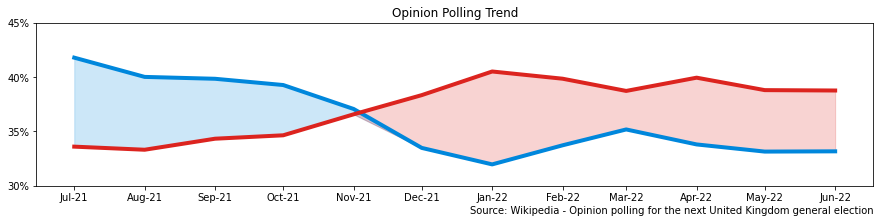

In [38]:
from scripts.constants import party_colors, major_parties
import matplotlib.pyplot as plt
from numpy import arange

fig = plt.figure(figsize=(15, 3))
fig.set_facecolor('white')
ax = plt.gca()

# monthly_summary[major_parties[:2]][1:].plot(
#     ax=ax,
#     ylim=[30, 45],
#     color=party_colors,
#     linewidth=3
# )
for party in major_parties[:2]:
    plt.plot_date(
        x=monthly_summary.index[1:],
        y= monthly_summary[party][1:],
        fmt='-',
        color=party_colors[party],
        linewidth=4)

    ax.fill_between(monthly_summary.index[1:], monthly_summary[party][1:], monthly_summary[major_parties[:2]].min(axis=1)[1:], color=party_colors[party], alpha=0.2)
ax.set_yticks(arange(30, 46, 5), minor=False)
major_locator = plt.matplotlib.dates.DayLocator([1])
major_fmt = plt.matplotlib.dates.DateFormatter('%b-%y')

ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_major_formatter(major_fmt)

ax.yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: f'{x/100:.0%}'))

plot_title = 'Opinion Polling Trend'
plt.title(plot_title)

source = 'Source: Wikipedia - Opinion polling for the next United Kingdom general election'
plt.annotate(source, (1, 0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', ha='right')
fig.savefig('html_outputs/monthly_trend.png', bbox_inches = 'tight', pad_inches = 0.2)

In [39]:
monthly_summary

,conservative,labour,liberal_democrat,pollster_count,poll_count,lead,lead_value
poll_month,,,,,,,
2021-06-01,43.477778,33.455556,7.566667,9,24,con+10.0,10.022222
2021-07-01,41.787037,33.601852,9.444444,9,21,con+8.2,8.185185
2021-08-01,40.016667,33.316667,10.400000,6,18,con+6.7,6.700000
2021-09-01,39.843333,34.331667,9.376667,10,23,con+5.5,5.511667
2021-10-01,39.268750,34.645833,8.289583,8,20,con+4.6,4.622917
2021-11-01,37.066667,36.575000,9.250000,10,23,con+0.5,0.491667
2021-12-01,33.484848,38.340909,10.159091,11,30,lab+4.9,4.856061
2022-01-01,31.969444,40.513889,10.919444,12,29,lab+8.5,8.544444
2022-02-01,33.725000,39.850000,10.300000,10,23,lab+6.1,6.125000


In [40]:
import datetime

<AxesSubplot:xlabel='date_concluded'>

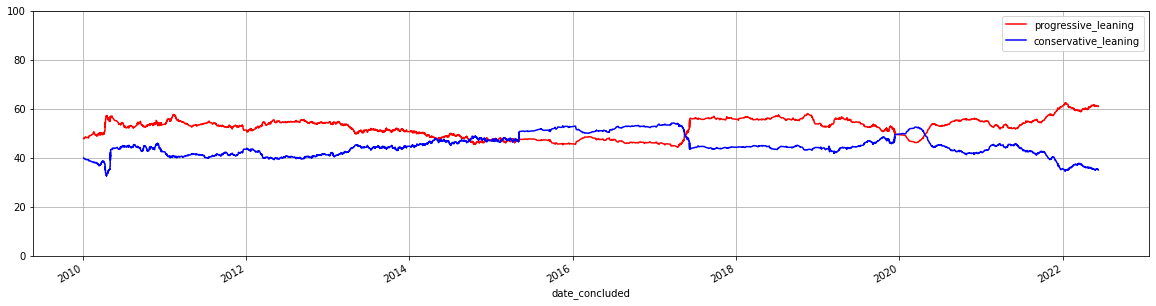

In [41]:
all_polls['progressive_leaning']=all_polls[['labour', 'liberal_democrat', 'alliance', 'change_uk', 'green', 'liberal', 'plaid_cymru', 'scottish_national_party', 'social_democratic_party']].sum(axis=1)
all_polls['conservative_leaning']=all_polls[['conservative', 'brexit_party', 'reform_uk','united_kingdom_independence_party', 'reclaim_party']].sum(axis=1)
(all_polls
 .set_index('date_concluded')
 .rolling(window=15).mean()
 .loc[:datetime.date(2010,1,1)]
 [['progressive_leaning','conservative_leaning']]
 .plot(
    color=['r','b']
    ,figsize=[20,5]
    ,grid='y'
    ,ylim=[0,100]
)
)

In [42]:
all_polls.set_index('date_concluded').rolling(window=10).mean()

,conservative,labour,liberal_democrat,alliance,brexit_party,change_uk,green,liberal,plaid_cymru,reform_uk,scottish_national_party,social_democratic_party,united_kingdom_independence_party,reclaim_party,others,lead_value,anti_conservative,progressive_leaning,conservative_leaning
date_concluded,,,,,,,,,,,,,,,,,,,
2022-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-11-15,40.80,49.15,NaN,NaN,NaN,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.65,49.15,57.00,40.80
1970-10-18,42.10,48.30,NaN,NaN,NaN,NaN,NaN,7.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.50,48.30,55.95,42.10
1970-09-13,43.15,47.30,NaN,NaN,NaN,NaN,NaN,7.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.95,47.30,54.95,43.15


In [43]:
all_polls.set_index('date_concluded').loc[datetime.date(2020,1,1):]

,date_started,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,brexit_party,...,scottish_national_party,social_democratic_party,united_kingdom_independence_party,reclaim_party,others,lead,lead_value,anti_conservative,progressive_leaning,conservative_leaning
date_concluded,,,,,,,,,,,,,,,,,,,,,
2019-12-12,2019-12-12,General Election,NaN,GB,–,44.7,33.0,11.8,NaN,2.1,...,4.0,NaN,0.1,NaN,1.0,con+11.7,11.7,52.1,52.1,46.9
2019-12-12,2019-12-12,General Election,2019 general election,GB,–,44.7,32.9,11.8,NaN,2.1,...,4.0,NaN,NaN,NaN,2.2,con+11.8,11.8,51.5,51.5,46.8
2019-12-12,2019-12-12,General Election,2019 general election,UK,–,43.6,32.1,11.6,NaN,2.0,...,3.9,NaN,NaN,NaN,3.7,con+11.5,11.5,50.3,50.3,45.6
2019-12-11,2019-12-10,Survation,NaN,GB,2395,45.0,34.0,9.0,NaN,3.0,...,4.0,NaN,NaN,NaN,1.0,con+11.0,11.0,51.0,51.0,48.0
2019-12-11,2019-12-10,Panelbase,NaN,GB,3174,43.0,34.0,11.0,NaN,4.0,...,4.0,NaN,NaN,NaN,NaN,con+9.0,9.0,52.0,52.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-11-15,1970-11-15,Gallup,The Daily Telegraph,NaN,NaN,43.5,48.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,lab+4.5,4.5,48.0,54.5,43.5
1970-10-18,1970-10-18,Gallup,The Daily Telegraph,NaN,NaN,46.5,46.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Tie,0.0,46.5,53.0,46.5
1970-09-13,1970-09-13,Gallup,The Daily Telegraph,NaN,NaN,46.5,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,con+2.5,2.5,44.0,52.0,46.5


In [44]:
one_year_polls['poll_month'] = one_year_polls['date_concluded'].apply(lambda x: x.replace(day=1))

In [45]:
kantar_polls = all_polls.query('pollster == "Kantar Public" and date_concluded> "2019-01-01"').copy()
other_polls = all_polls.query('pollster != "Kantar Public" and date_concluded> "2019-01-01"').copy()

In [46]:
kantar_polls['poll_month'] = kantar_polls['date_concluded'].apply(lambda x: x.replace(day=1))
other_polls['poll_month'] = other_polls['date_concluded'].apply(lambda x: x.replace(day=1))

In [47]:
other_pollster_monthly_summary = other_polls.groupby(['poll_month', 'pollster'])[major_parties].agg(['mean', 'count'])
other_pollster_monthly_summary.columns = [x if i == 0 else f'count{major_parties.index(x)}' for x in major_parties for i in
                                    range(0, 2)]
other_pollster_monthly_summary.drop(columns=[f'count{major_parties.index(x)}' for x in major_parties][1:], inplace=True)
other_pollster_monthly_summary.rename(columns={"count0": "count"}, inplace=True)

agg_info = {x: ['mean'] for x in major_parties}
agg_info['count'] = ['count', 'sum']
other_monthly_summary = other_pollster_monthly_summary.reset_index().groupby(['poll_month']).agg(agg_info)
other_monthly_summary.columns = major_parties + ['pollster_count', 'poll_count']

In [48]:
kantar_pollster_monthly_summary = kantar_polls.groupby(['poll_month', 'pollster'])[major_parties].agg(['mean', 'count'])
kantar_pollster_monthly_summary.columns = [x if i == 0 else f'count{major_parties.index(x)}' for x in major_parties for i in
                                    range(0, 2)]
kantar_pollster_monthly_summary.drop(columns=[f'count{major_parties.index(x)}' for x in major_parties][1:], inplace=True)
kantar_pollster_monthly_summary.rename(columns={"count0": "count"}, inplace=True)

agg_info = {x: ['mean'] for x in major_parties}
agg_info['count'] = ['count', 'sum']
kantar_monthly_summary = kantar_pollster_monthly_summary.reset_index().groupby(['poll_month']).agg(agg_info)
kantar_monthly_summary.columns = major_parties + ['pollster_count', 'poll_count']

In [49]:
other_monthly_summary[['kantar_con','kantar_lab']] = kantar_monthly_summary[['conservative','labour']]

In [50]:
other_monthly_summary.to_clipboard(sep='\t')

In [51]:
general_elections = all_polls.query('pollster=="General Election"')
general_election_dates = list(general_elections.date_concluded.unique())
#general_elections = general_elections[general_elections.date_concluded > datetime.datetime(2016,1,1)]

In [52]:
for ge in general_election_dates[::-1]:
    if ge < np.datetime64('2016-01-01'):
        continue

    print(ge)

2017-06-08T00:00:00.000000000
2019-12-12T00:00:00.000000000


In [53]:
general_elections[general_elections.date_concluded == ge]

,date_started,date_concluded,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,scottish_national_party,social_democratic_party,united_kingdom_independence_party,reclaim_party,others,lead,lead_value,anti_conservative,progressive_leaning,conservative_leaning
574,2019-12-12,2019-12-12,General Election,NaN,GB,–,44.7,33.0,11.8,NaN,...,4.0,NaN,0.1,NaN,1.0,con+11.7,11.7,52.1,52.1,46.9
575,2019-12-12,2019-12-12,General Election,2019 general election,GB,–,44.7,32.9,11.8,NaN,...,4.0,NaN,NaN,NaN,2.2,con+11.8,11.8,51.5,51.5,46.8
576,2019-12-12,2019-12-12,General Election,2019 general election,UK,–,43.6,32.1,11.6,NaN,...,3.9,NaN,NaN,NaN,3.7,con+11.5,11.5,50.3,50.3,45.6


In [54]:
GEs_to_use = [



]

In [55]:
all_polls.query('pollster=="General Election"')

,date_started,date_concluded,pollster,client,area,sample_size,conservative,labour,liberal_democrat,alliance,...,scottish_national_party,social_democratic_party,united_kingdom_independence_party,reclaim_party,others,lead,lead_value,anti_conservative,progressive_leaning,conservative_leaning
574,2019-12-12,2019-12-12,General Election,NaN,GB,–,44.7,33.0,11.8,NaN,...,4.0,NaN,0.1,NaN,1.0,con+11.7,11.7,52.1,52.1,46.9
575,2019-12-12,2019-12-12,General Election,2019 general election,GB,–,44.7,32.9,11.8,NaN,...,4.0,NaN,NaN,NaN,2.2,con+11.8,11.8,51.5,51.5,46.8
576,2019-12-12,2019-12-12,General Election,2019 general election,UK,–,43.6,32.1,11.6,NaN,...,3.9,NaN,NaN,NaN,3.7,con+11.5,11.5,50.3,50.3,45.6
1034,2017-06-08,2017-06-08,General Election,NaN,GB,–,43.4,41.0,7.6,NaN,...,3.1,NaN,1.9,NaN,0.8,con+2.4,2.4,53.9,53.9,45.3
1035,2017-06-08,2017-06-08,General Election,NaN,UK,–,42.3,40.0,7.4,NaN,...,3.0,NaN,1.8,NaN,3.3,con+2.3,2.3,52.5,52.5,44.1
1036,2017-06-08,2017-06-08,General Election,NaN,NaN,–,43.5,41.0,7.6,NaN,...,3.1,NaN,1.9,NaN,1.2,con+2.5,2.5,53.4,53.4,45.4
1295,2015-05-07,2015-05-07,General Election,NaN,NaN,–,37.8,31.2,8.1,NaN,...,4.9,NaN,12.9,NaN,1.4,con+6.6,6.6,48.0,48.0,50.7
3263,2010-05-06,2010-05-06,General Election,NaN,NaN,–,36.9,29.7,23.6,NaN,...,NaN,NaN,3.1,NaN,5.7,con+7.2,7.2,54.3,54.3,40.0
3264,2010-05-06,2010-05-06,General Election,2010 general election,NaN,–,36.9,29.7,23.6,NaN,...,NaN,NaN,NaN,NaN,9.8,con+7.2,7.2,53.3,53.3,36.9
3866,2005-05-05,2005-05-05,General Election,None,NaN,–,33.2,36.2,22.7,NaN,...,NaN,NaN,NaN,NaN,7.9,lab+3.0,3.0,58.9,58.9,33.2
